<a href="https://colab.research.google.com/github/hepuliu/Masters_Thesis/blob/sandbox_pink/sandbox_pink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Master Thesis Simulation Sandbox
Flood Prevention Dam Sizing with Machine Learining Approaches - Hepu Liu

### Overall Project Simulation Steps
1. Process discharge data from Waldangelbach Station

2. Process precipitation data from Baiertal  Station

3. Build Prediction Model (Model A)

4. Process precipitation data from Stifterhof Station

5. Process precipitation data from Waibstadt Station (optional)

6. Process precipitation data from Stetten Station (optional

7. Fit data to Model A to predict discharge

### Variable Naming Conventions

- Weather Stations Naming: ('p' for precipitation, 'd' for discharge, 'a' to 'd' for different stations, 'r' for result)

  - da: Waldangelbach Station
  - pa: Baiertal Station
  - pb: Stifterhof Station
  - pc: Waibstadt Station
  - pd: Stetten Station
  - pr: combined/resulting precipitation
  - dr: predicted/resulting discharge

- Variable Naming Coventions: 
  - df: data frame
  - trs: training set
  - tes: testing set

### NSE Equation

NSE = 1 - sum(Qsim - Qobs)^2 / sum(Qobs-Qobsavg)^2

## Importing Libraries

In [417]:
# importing libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet
from google.colab import drive
drive.mount

<function google.colab.drive.mount>

## Importing Datasets

In [418]:
# df_fbp = pd.read_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/df_fbp.csv')
# df_fbp.dtypes

In [419]:
# # import datasets
# da_dr_fbp = pd.read_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/da_dr_fbp.csv')
# da_dr_fbp.dtypes

## Data Processing

In [420]:
# results_df = df_fbp.merge(da_dr_fbp, on='ds', how='left')
# results_df.to_csv('/content/drive/MyDrive/thesis/dataset/results/da_dr_fbp.csv', index=False)

In [421]:
# # import datasets
# da_dr_fbp = pd.read_csv('/content/drive/MyDrive/thesis/dataset/results/da_dr_fbp_2.csv')
# da_dr_fbp

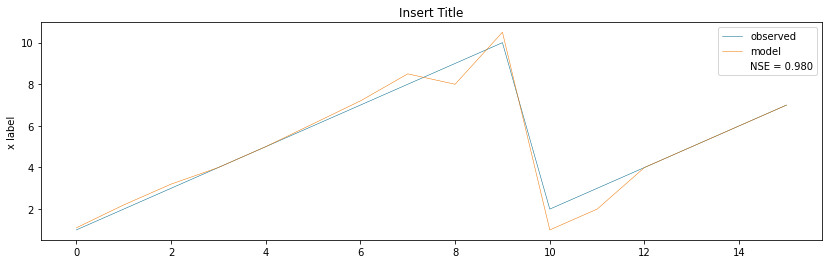

In [422]:
# Test NSE Calculation

o = np.array([1,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7])
m = np.array([1.1,2.2,3.2,4,5,6.1,7.2,8.5,8,10.5,1,2,4,5,6,7])
# nse = 1-(np.sum((p-t)**2)/np.sum((t-np.mean(t))**2))
# print('Test NSE: %.3f' % nse)
# plot


fig= plt.figure(figsize=(14, 4))
plt.title('Insert Title')
plt.plot(o, label='observed', color='#00688b', linewidth=0.5)
plt.plot(m, label='model', color='#ee7600', linewidth=0.5)
plt.plot([], [], ' ', label='NSE = %.3f' % nse)
plt.ylabel('y label')
plt.ylabel('x label')
plt.legend()
plt.show()



## Evaluation

In [423]:
# # Calculate NSE FBProphet
# da_dr_fbp['num']= (da_dr_fbp['y']-da_dr_fbp['yhat'])**2
# da_dr_fbp['denom']=(da_dr_fbp['y']-da_dr_fbp['y'].mean())**2
# NSE = 1 - (da_dr_fbp['num'].sum()/da_dr_fbp['denom'].sum())
# NSE

# Archive

In [424]:
# # Cleanup Discharge A DataFrame da_df
# da_df = pd.read_csv('/content/drive/MyDrive/thesis/dataset/Wiesloch_waldangelbach_hourly_20070101-20210501.csv')
# da_df = da_df.iloc[13:].reset_index(drop=True)
# da_df.columns = da_df.iloc[0]
# da_df = da_df.iloc[3:].reset_index(drop=True)
# da_df = da_df.iloc[:, 4:7] # precipitation unit [m3/s]
# da_df['Uhrzeit'] = da_df['Uhrzeit'].str.replace(' v', '')
# da_df['t'] = pd.to_datetime(da_df['Datum']+' '+da_df['Uhrzeit'], format=('%y-%m-%d %H:%M:%S'))
# da_df = da_df.iloc[:,2:]
# da_df.columns = ['discharge [m3/s]', 't']
# da_df = da_df[['t','discharge [m3/s]']]
# da_df.to_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/da_df.csv', index=False)

In [425]:
# # Cleanup Precipitation A DataFrame pa_df
# pa_df = pd.read_csv('/content/drive/MyDrive/thesis/dataset/Weather_station_Baiertal.csv')
# pa_df.columns = pa_df.iloc[0]
# pa_df = pa_df.iloc[1:].reset_index(drop=True)
# pa_df['t'] = pd.to_datetime(pa_df['date']+' '+pa_df['time'], format=('%y-%m-%d %H:%M'))
# pa_df = pa_df.iloc[:,2:]
# cols = list(pa_df.columns)
# cols = [cols[-1]] + cols[:-1]
# pa_df = pa_df[cols]
# pa_df.to_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/pa_df.csv', index=False)


In [426]:
# # Cleanup Precipitation B DataFrame pb_df
# pb_df = pd.read_csv('/content/drive/MyDrive/thesis/dataset/Weather_station_Stifterhof.csv')
# pb_df.columns = pb_df.iloc[0]
# pb_df = pb_df.iloc[1:].reset_index(drop=True)
# pb_df['t'] = pd.to_datetime(pb_df['date']+' '+pb_df['time'], format=('%y-%m-%d %H:%M'))
# pb_df = pb_df.iloc[:,2:]
# cols = list(pb_df.columns)
# cols = [cols[-1]] + cols[:-1]
# pb_df = pb_df[cols]
# pb_df.to_csv('/content/drive/MyDrive/thesis/dataset/cleaned_df/pb_df.csv', index=False)

In [427]:
# # Plot Line Graph 20000 row with GPU = 3mins
# def line_plot(df, title):
#   label_font = {'family':'serif', 'color':'black', 'size':'12'}
#   title_font = {'family':'serif', 'color':'black', 'size':'14'}
#   fig = plt.figure(figsize=(8,8))
#   plt.plot(df['ds'], df['yhat'])
#   plt.xlabel( 't', fontdict = label_font)
#   plt.ylabel( 'd', fontdict = label_font)
#   plt.title(title, fontdict = title_font)
   
# # line_plot(da_df, 'Discharge A')
